# Conversation Analysis (12 AI Agents - 12 Dilemmas)

performing a deep analysis on the conversation logs generated by your code. This notebook will include general statistics, agent-specific analysis, and visualizations to provide insights into the conversations.


### Import Libraries

In [ ]:
# %pip install pandas numpy
# %pip install TextBlob wordcloud

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json
from textblob import TextBlob  # For sentiment analysis
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/wisalkhanmv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:

# Set up visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the conversation logs
filepath = "logs/conversations_history.csv"
df = pd.read_csv(filepath)

# Display the first few rows of the dataset
print("Conversation Logs Overview:")
df

Conversation Logs Overview:


conversation_id                                       dilemma_name  \
0     20250207162659                             The Free Rider Problem   
1     20250207163032  Overusing Shared Resources (Tragedy of the Com...   
2     20250207163449                              Whistleblowing Ethics   
3     20250207163837                 Online Trolling and Misinformation   
4     20250207164254                      Vaccination and Herd Immunity   
..               ...                                                ...   
127   20250208180553                                The Neighbor's Tree   
128   20250208180730                                The Neighbor's Tree   
129   20250208180843                                The Neighbor's Tree   
130   20250208181000                                The Neighbor's Tree   
131   20250208181111                                The Neighbor's Tree   

                                   dilemma_description  \
0    A team of five is working on a project. Everyo...   
1    A village shares a common water supply. Overus...   
2    You work at a company where you discover uneth...   
3    You manage a social media platform. A group sp...   
4    A new vaccine is released for a contagious dis...   
..                                                 ...   
127  Your neighbor's tree drops leaves into your ya...   
128  Your neighbor's tree drops leaves into your ya...   
129  Your neighbor's tree drops leaves into your ya...   
130  Your neighbor's tree drops leaves into your ya...   
131  Your neighbor's tree drops leaves into your ya...   

                                          room_history  \
0    [{"role": "moderator", "message": "We are a ro...   
1    [{"role": "moderator", "message": "We are a ro...   
2    [{"role": "moderator", "message": "We are a ro...   
3    [{"role": "moderator", "message": "We are a ro...   
4    [{"role": "moderator", "message": "We are a ro...   
..                                                 ...   
127  [{"role": "moderator", "message": "We are a ro...   
128  [{"role": "moderator", "message": "We are a ro...   
129  [{"role": "moderator", "message": "We are a ro...   
130  [{"role": "moderator", "message": "We are a ro...   
131  [{"role": "moderator", "message": "We are a ro...   

                                        final_decision  final_consensus  \
0    To effectively tackle the Free Rider Problem, ...            False   
1    My final position is that we should implement ...            False   
2    I firmly believe that to effectively address w...            False   
3    I believe we should implement a proactive, com...            False   
4    I firmly believe that fostering a community-or...            False   
..                                                 ...              ...   
127  I believe we should approach the situation wit...            False   
128  I believe we should approach our neighbor's le...            False   
129  I believe the best approach to resolve neighbo...            False   
130  I believe we should approach the situation wit...            False   
131  I believe we should approach community dispute...            False   

                                  individual_positions  max_rounds  \
0    {"The Visionary": "To effectively tackle the F...           5   
1    {"The Visionary": "My final position is that w...           5   
2    {"The Visionary": "I firmly believe that to ef...           5   
3    {"The Visionary": "I believe we should impleme...           5   
4    {"The Visionary": "I firmly believe that foste...           5   
..                                                 ...         ...   
127  {"The Visionary": "I believe we should approac...           3   
128  {"The Visionary": "I believe we should approac...           1   
129  {"The Visionary": "I believe the best approach...           2   
130  {"The Visionary": "I believe we should approac...           3   
131  {"The Visionary": "I believe we sh

In [7]:

# General Statistics
print("\nGeneral Statistics:")
print(f"Total Conversations: {len(df)}")
print(f"Unique Dilemmas: {df['dilemma_name'].nunique()}")
print(f"Agents Involved: {json.loads(df['agents'].iloc[0])}")  # Assuming agents are the same across all logs



General Statistics:
Total Conversations: 50
Unique Dilemmas: 12
Agents Involved: ['The Visionary', 'The Strategist', 'The Nurturer', 'The Explorer', 'The Moderator', 'The Innovator', 'The Realist', 'The Advocate', 'The Negotiator', 'The Analyst', 'The Optimist', 'The Pragmatist']


In [8]:

# Convert room_history from JSON string to list of dictionaries
df['room_history'] = df['room_history'].apply(json.loads)


In [9]:

# Function to extract messages by role
def extract_messages_by_role(room_history, role):
    return [msg['message'] for msg in room_history if msg['role'] == role]

# Analyze each agent's contributions
agents = json.loads(df['agents'].iloc[0])
agent_analysis = {}

for agent in agents:
    agent_analysis[agent] = {
        'total_messages': 0,
        'total_words': 0,
        'unique_words': set(),
        'word_frequency': Counter(),
        'sentiment_scores': []
    }

# Iterate through each conversation
for index, row in df.iterrows():
    room_history = row['room_history']
    for agent in agents:
        messages = extract_messages_by_role(room_history, agent)
        agent_analysis[agent]['total_messages'] += len(messages)
        for message in messages:
            words = message.split()
            agent_analysis[agent]['total_words'] += len(words)
            agent_analysis[agent]['unique_words'].update(words)
            agent_analysis[agent]['word_frequency'].update(words)
            # Sentiment analysis
            sentiment = TextBlob(message).sentiment.polarity
            agent_analysis[agent]['sentiment_scores'].append(sentiment)


In [10]:

# Convert unique words to counts
for agent in agents:
    agent_analysis[agent]['unique_word_count'] = len(agent_analysis[agent]['unique_words'])

# Display agent-specific statistics
print("\nAgent-Specific Statistics:")
for agent, stats in agent_analysis.items():
    print(f"\nAgent: {agent}")
    print(f"Total Messages: {stats['total_messages']}")
    print(f"Total Words: {stats['total_words']}")
    print(f"Unique Words: {stats['unique_word_count']}")
    print(f"Average Sentiment Score: {np.mean(stats['sentiment_scores']):.2f}")



Agent-Specific Statistics:

Agent: The Visionary
Total Messages: 133
Total Words: 14434
Unique Words: 2074
Average Sentiment Score: 0.21

Agent: The Strategist
Total Messages: 133
Total Words: 14597
Unique Words: 1988
Average Sentiment Score: 0.19

Agent: The Nurturer
Total Messages: 133
Total Words: 15301
Unique Words: 1833
Average Sentiment Score: 0.18

Agent: The Explorer
Total Messages: 133
Total Words: 13432
Unique Words: 1968
Average Sentiment Score: 0.27

Agent: The Moderator
Total Messages: 0
Total Words: 0
Unique Words: 0
Average Sentiment Score: nan

Agent: The Innovator
Total Messages: 133
Total Words: 14271
Unique Words: 2213
Average Sentiment Score: 0.22

Agent: The Realist
Total Messages: 133
Total Words: 14085
Unique Words: 1872
Average Sentiment Score: 0.22

Agent: The Advocate
Total Messages: 133
Total Words: 16261
Unique Words: 2017
Average Sentiment Score: 0.16

Agent: The Negotiator
Total Messages: 133
Total Words: 15145
Unique Words: 1817
Average Sentiment Score: 

/home/wisalkhanmv/anaconda3/envs/aio/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wisalkhanmv/anaconda3/envs/aio/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# Visualizations

/tmp/ipykernel_1000143/3316888234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(agents), y=[agent_analysis[agent]['total_messages'] for agent in agents], palette="viridis")


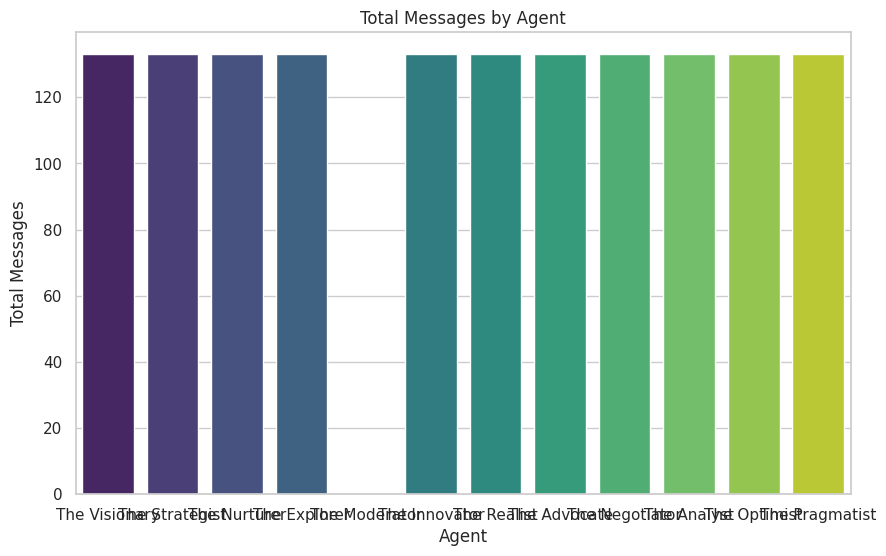

In [11]:


# 1. Total Messages by Agent
plt.figure(figsize=(10, 6))
sns.barplot(x=list(agents), y=[agent_analysis[agent]['total_messages'] for agent in agents], palette="viridis")
plt.title("Total Messages by Agent")
plt.xlabel("Agent")
plt.ylabel("Total Messages")
plt.show()


/tmp/ipykernel_1000143/751640533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(agents), y=[agent_analysis[agent]['total_words'] for agent in agents], palette="magma")


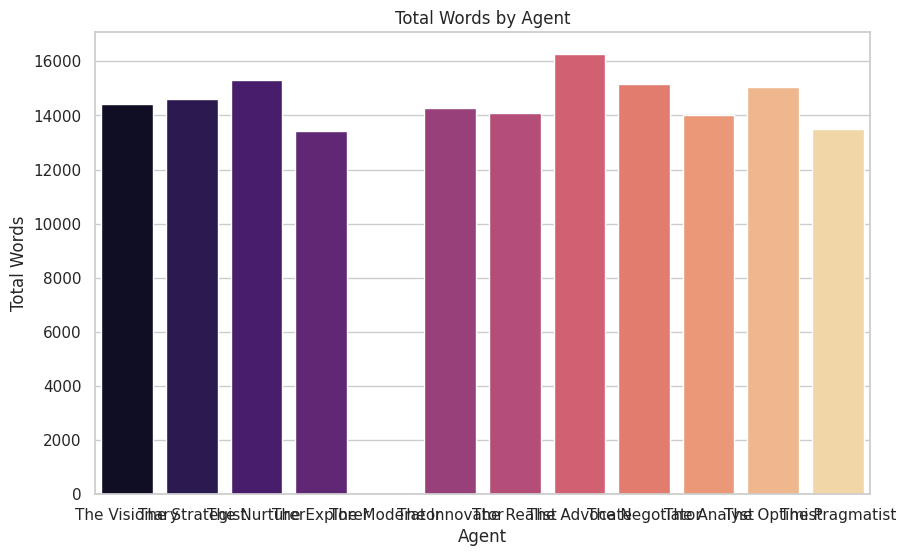

In [12]:

# 2. Total Words by Agent
plt.figure(figsize=(10, 6))
sns.barplot(x=list(agents), y=[agent_analysis[agent]['total_words'] for agent in agents], palette="magma")
plt.title("Total Words by Agent")
plt.xlabel("Agent")
plt.ylabel("Total Words")
plt.show()


/tmp/ipykernel_1000143/1236678869.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(agents), y=[agent_analysis[agent]['unique_word_count'] for agent in agents], palette="plasma")


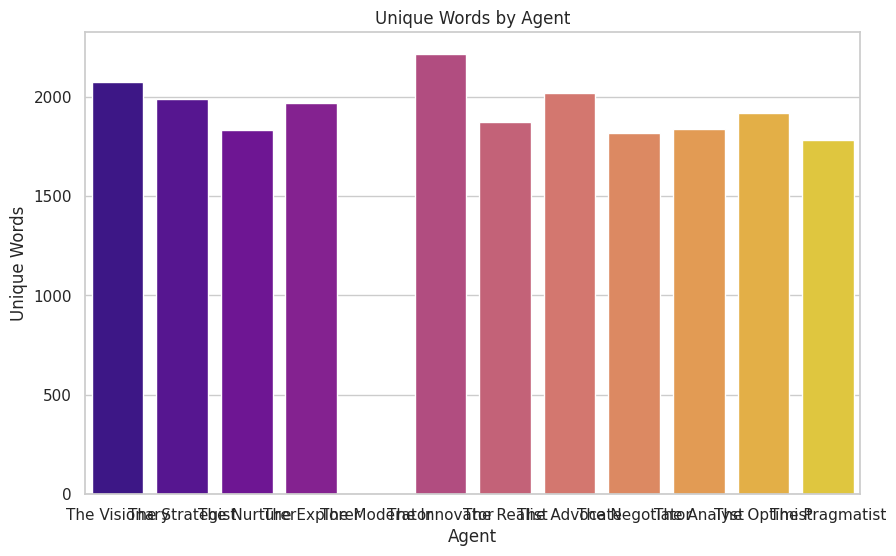

In [13]:

# 3. Unique Words by Agent
plt.figure(figsize=(10, 6))
sns.barplot(x=list(agents), y=[agent_analysis[agent]['unique_word_count'] for agent in agents], palette="plasma")
plt.title("Unique Words by Agent")
plt.xlabel("Agent")
plt.ylabel("Unique Words")
plt.show()


AGENT: The Visionary


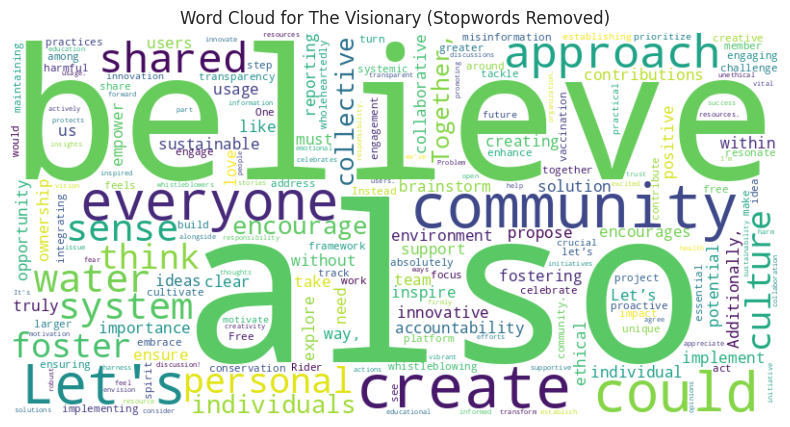

AGENT: The Strategist


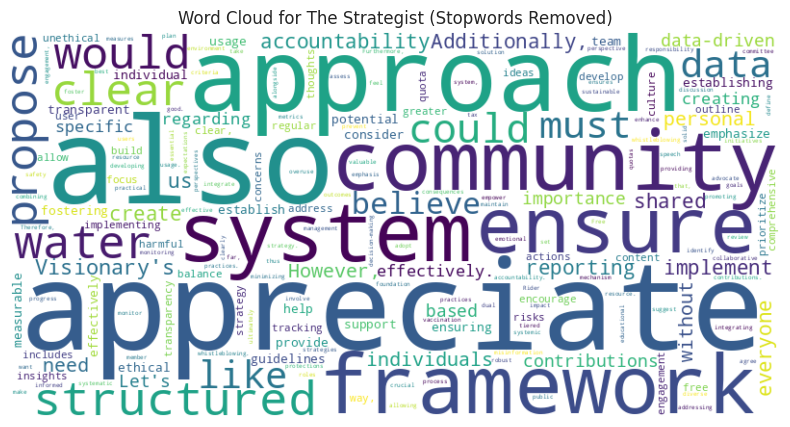

AGENT: The Nurturer


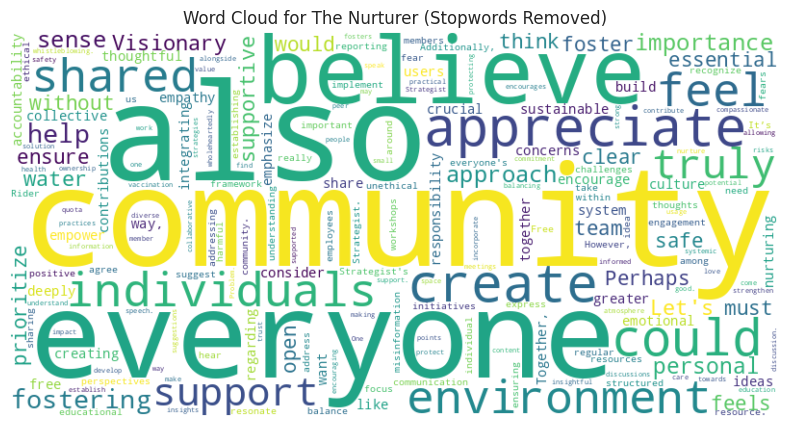

AGENT: The Explorer


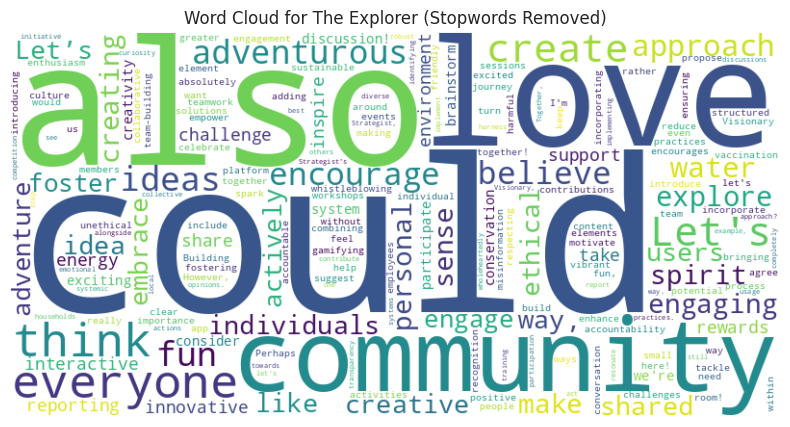

No words to display for The Moderator after removing stopwords.
AGENT: The Innovator


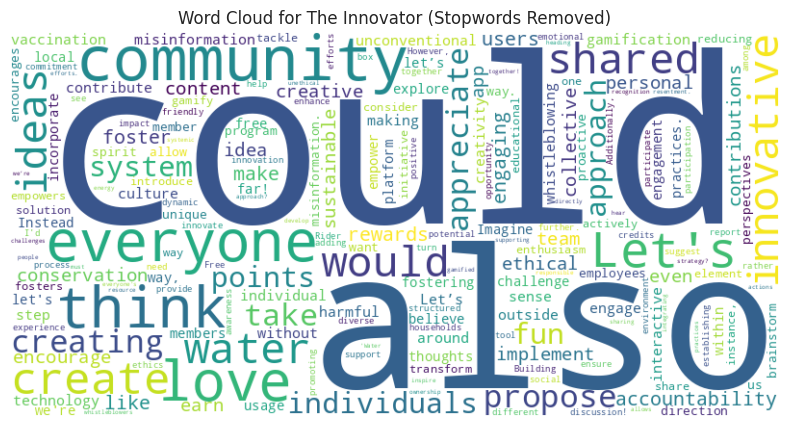

AGENT: The Realist


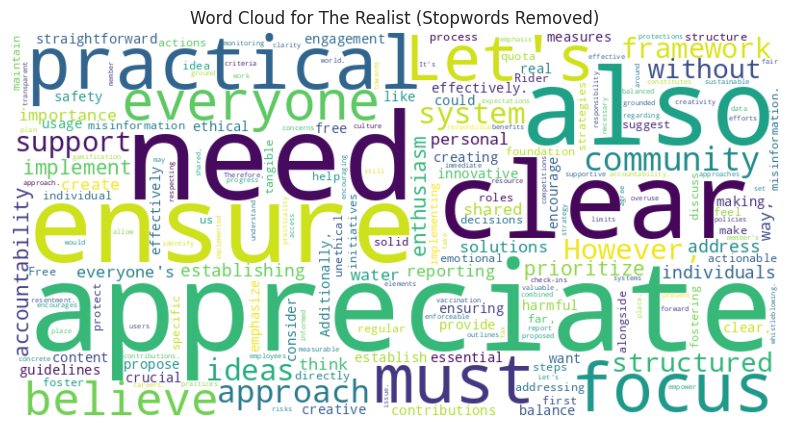

AGENT: The Advocate


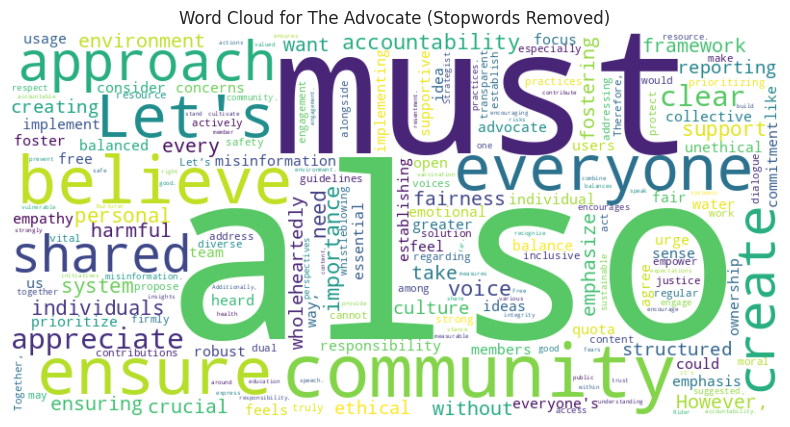

AGENT: The Negotiator


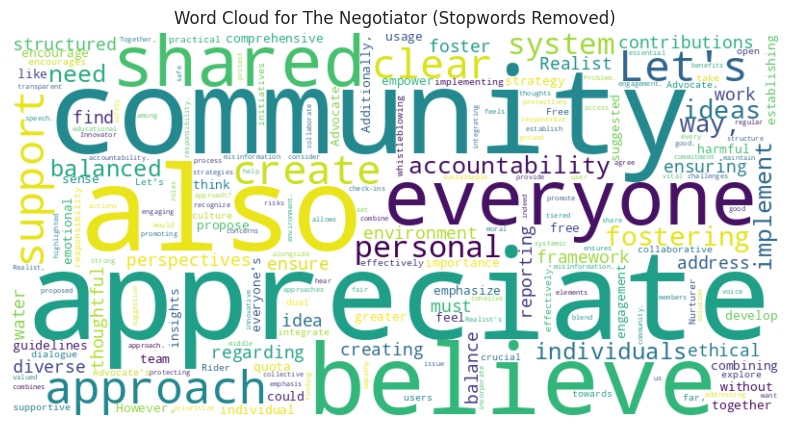

AGENT: The Analyst


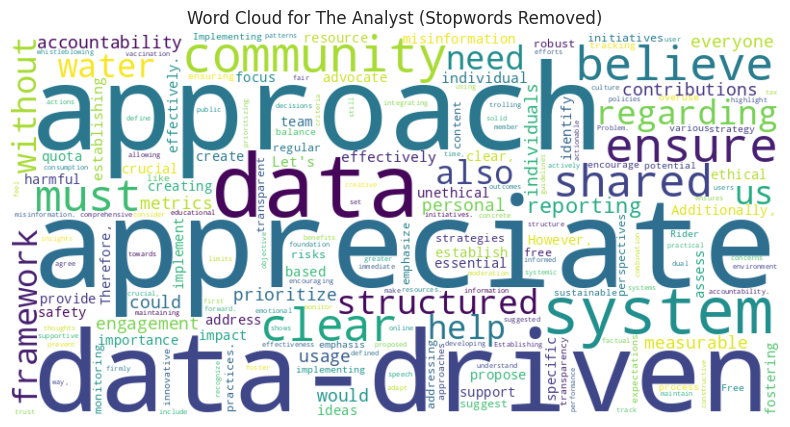

AGENT: The Optimist


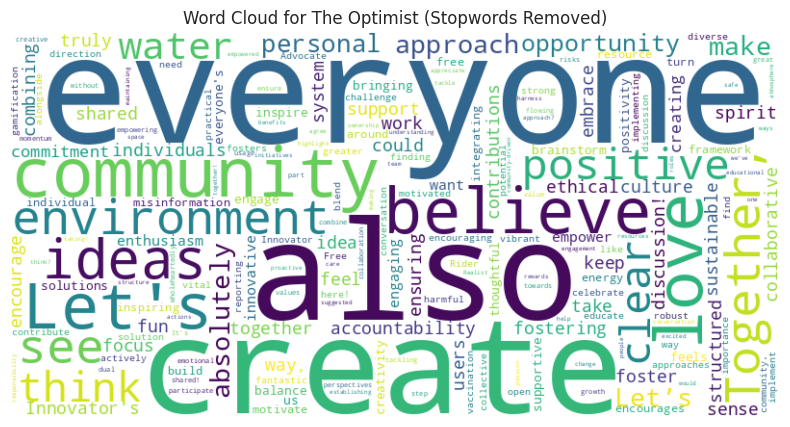

AGENT: The Pragmatist


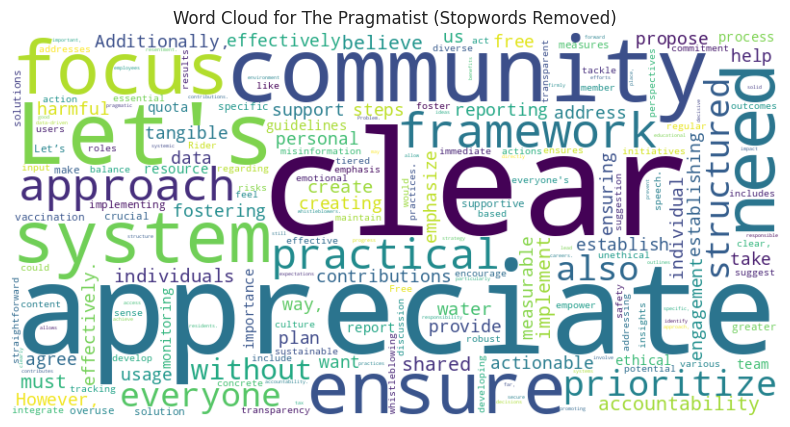

In [22]:
# 5. Word Clouds for Each Agent (with stopwords removed)
stop_words = set(stopwords.words('english'))

for agent in agents:
    word_freq = agent_analysis[agent]['word_frequency']
    
    # Remove stopwords from the word frequency dictionary
    filtered_word_freq = {word: freq for word, freq in word_freq.items() if word.lower() not in stop_words}
    
    # Skip agents with no words after filtering
    if not filtered_word_freq:
        print(f"No words to display for {agent} after removing stopwords.")
        continue
    print("AGENT:", agent)
    # Generate and display the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {agent} (Stopwords Removed)")
    plt.axis('off')
    plt.show()

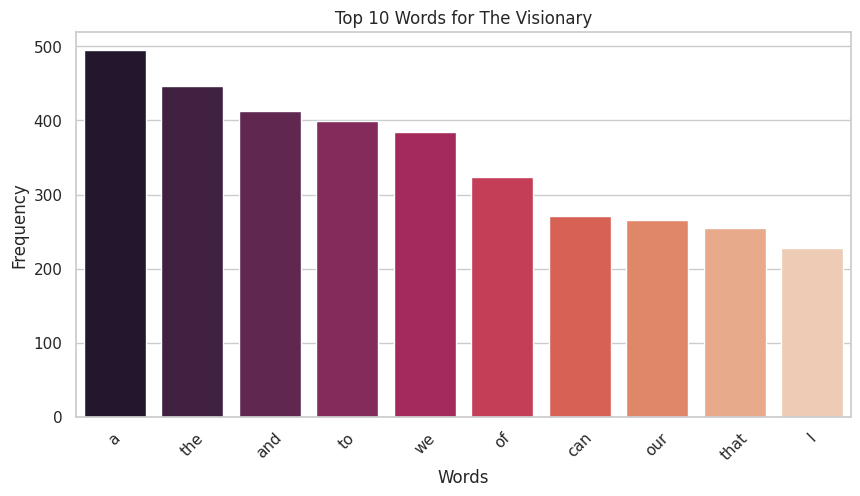

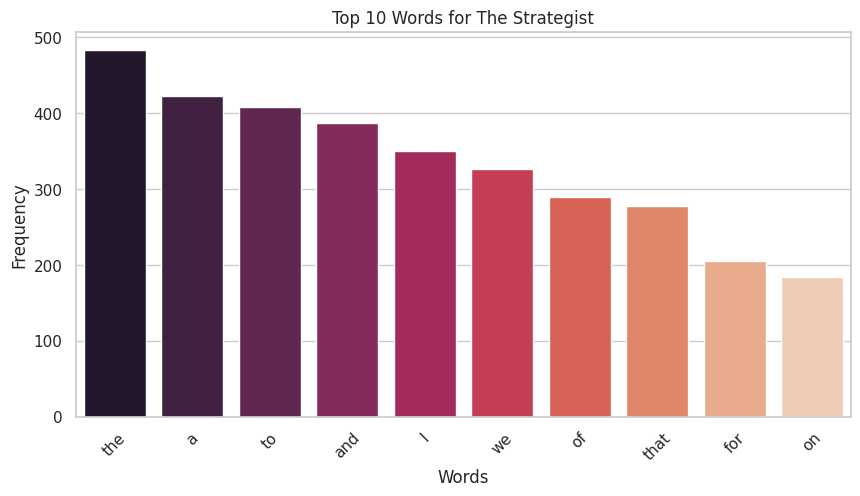

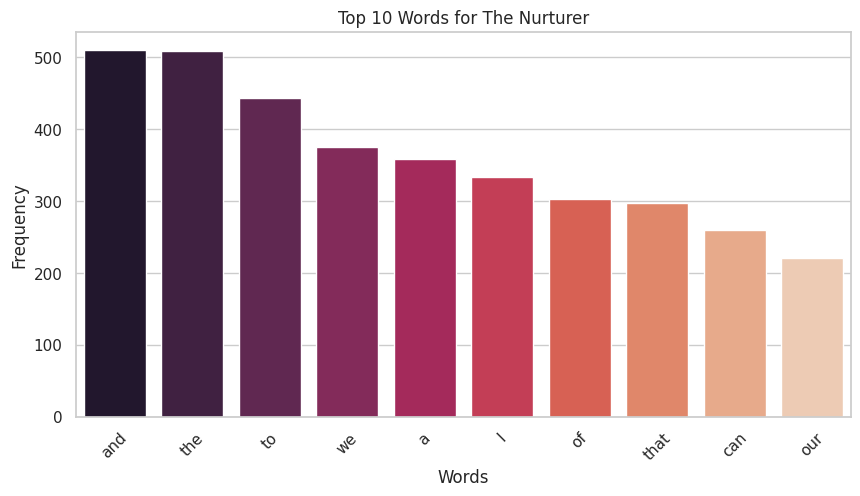

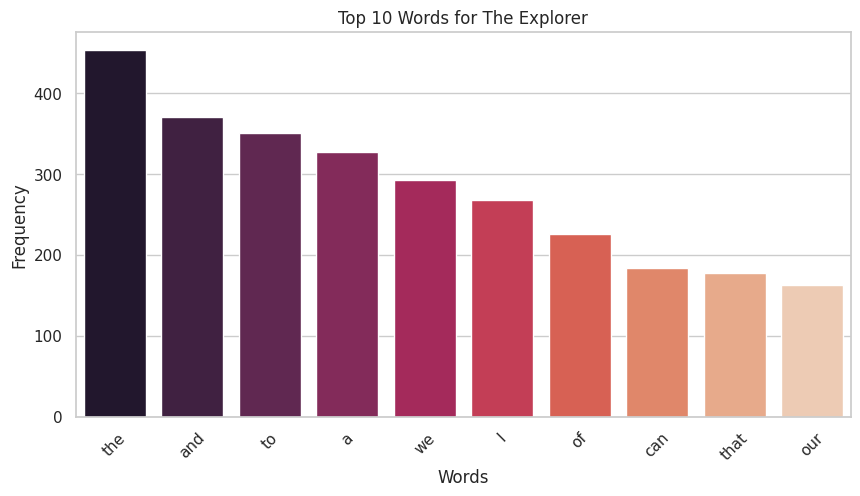

No words found for The Moderator.


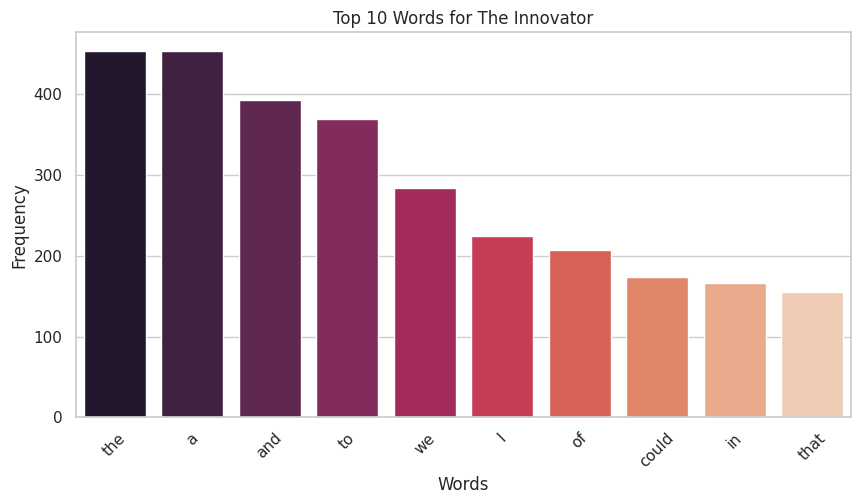

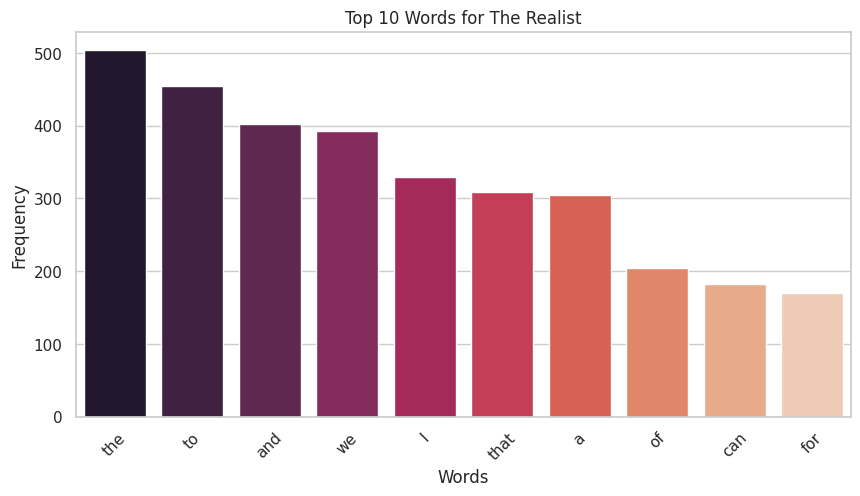

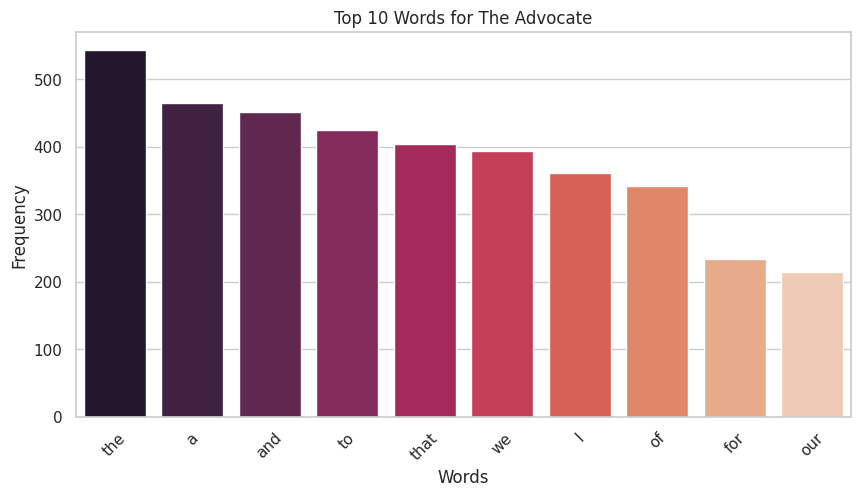

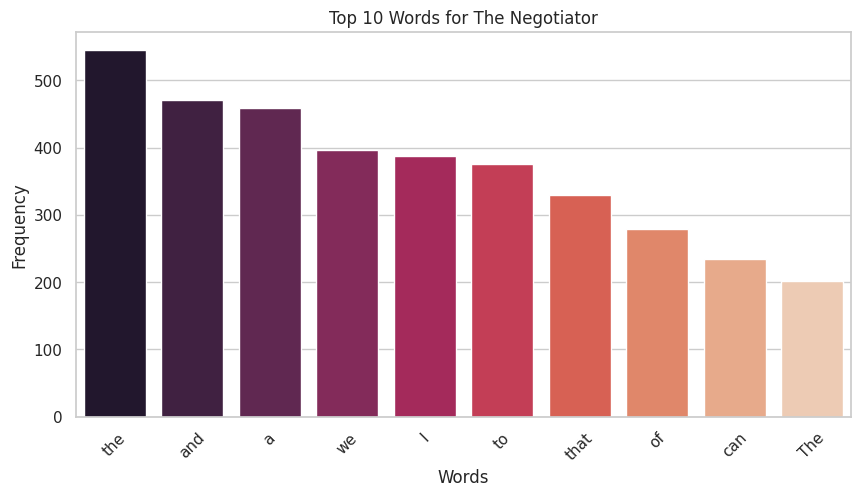

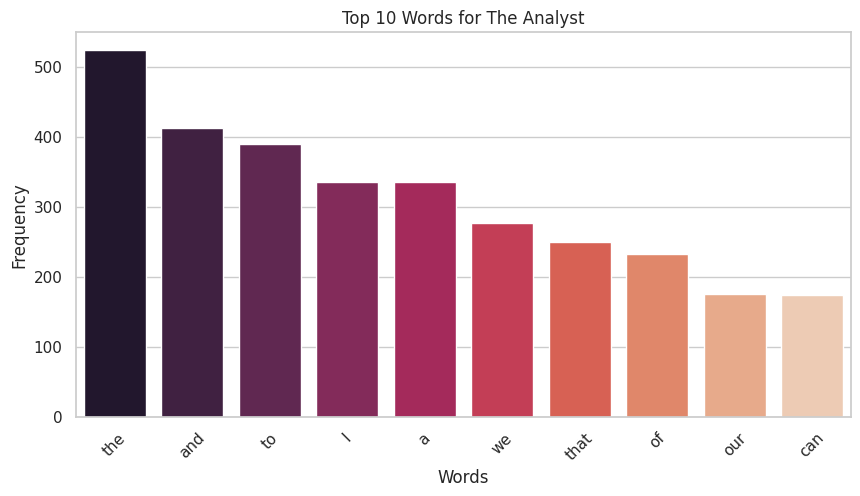

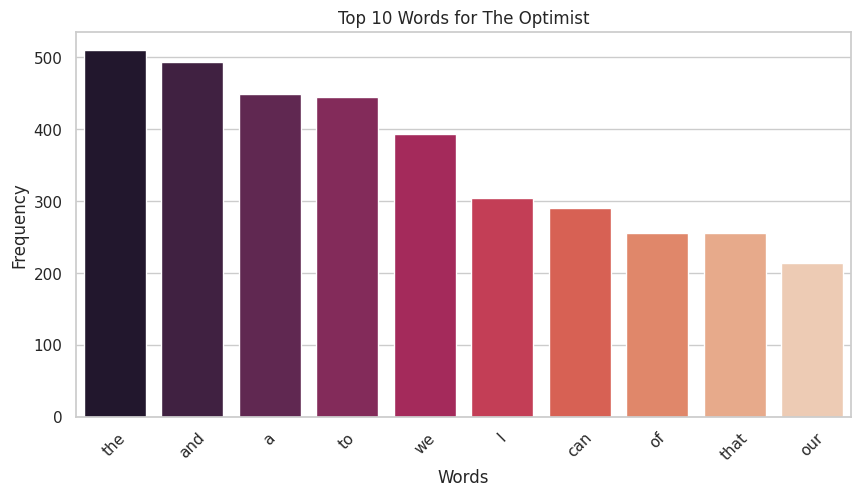

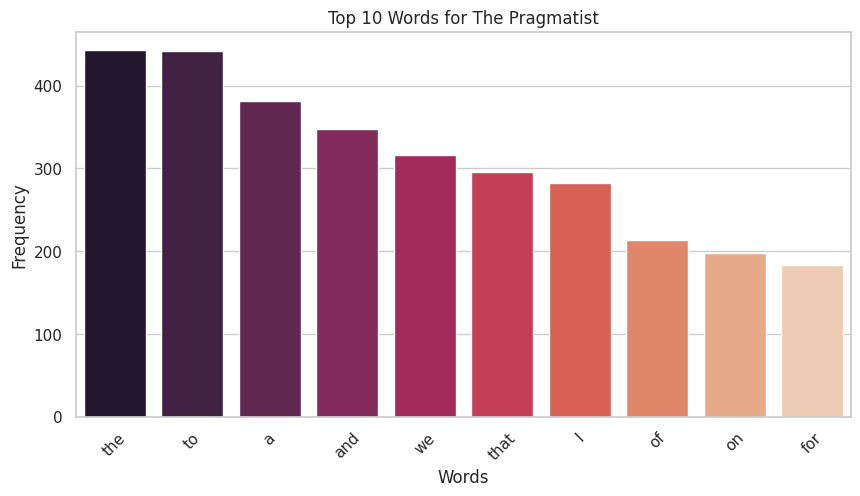

In [30]:
# 6. Most Common Words by Agent
for agent in agents:
    common_words = agent_analysis[agent]['word_frequency'].most_common(10)
    
    # Skip agents with no words
    if not common_words:
        print(f"No words found for {agent}.")
        continue
    
    # Unpack words and counts
    words, counts = zip(*common_words)
    
    # Plot the bar chart
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(words), y=list(counts), palette="rocket", hue=list(words))
    plt.title(f"Top 10 Words for {agent}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

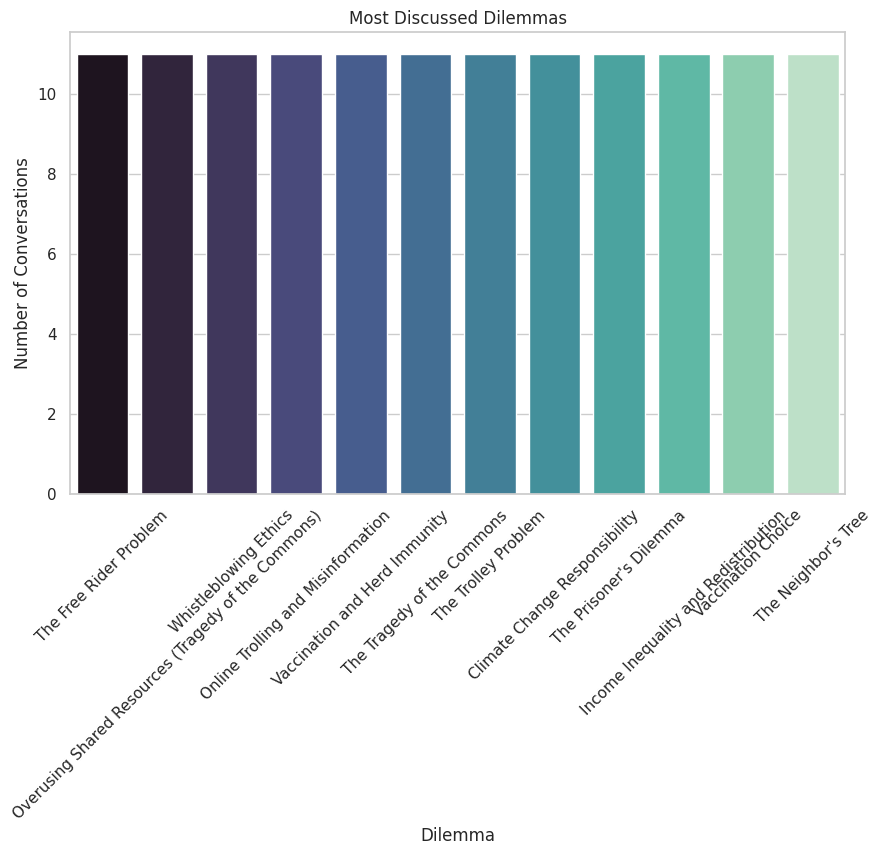

In [29]:

# 7. Dilemma Analysis: Most Discussed Dilemmas
dilemma_counts = df['dilemma_name'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=dilemma_counts.index, y=dilemma_counts.values, palette="mako", hue=dilemma_counts.index)
plt.title("Most Discussed Dilemmas")
plt.xlabel("Dilemma")
plt.ylabel("Number of Conversations")
plt.xticks(rotation=45)
plt.show()


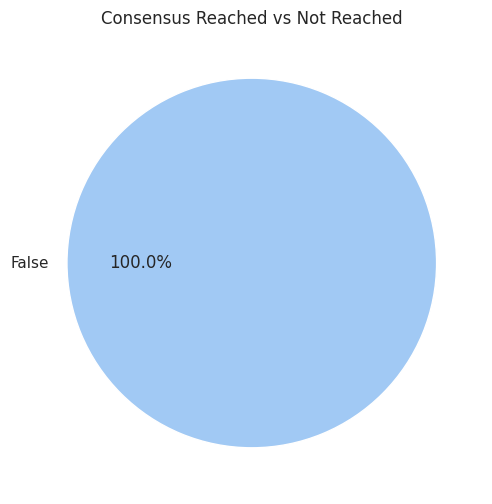

In [26]:

# 8. Consensus Analysis
consensus_counts = df['final_consensus'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(consensus_counts, labels=consensus_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Consensus Reached vs Not Reached")
plt.show()


In [19]:

# Conclusion
print("\nConclusion:")
"This analysis provides a comprehensive overview of the conversations, including agent-specific contributions, sentiment analysis, and dilemma-specific insights. The visualizations highlight key trends and patterns in the data."



Conclusion:


'This analysis provides a comprehensive overview of the conversations, including agent-specific contributions, sentiment analysis, and dilemma-specific insights. The visualizations highlight key trends and patterns in the data.'